In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("louisfan/dataset-for-dtvit")

print("Path to dataset files:", path)

100%|██████████| 424M/424M [00:19<00:00, 23.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1


Sample Images


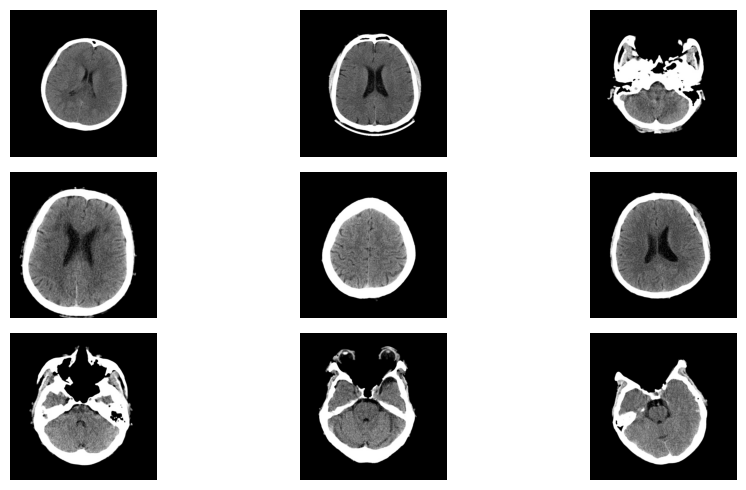

In [ ]:
import os
import random
import matplotlib.pyplot as plt

# Location of images
path = '/root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/dataset/no'
image_files = os.listdir(path)

print('Sample Images')

# Set the size of the images
plt.figure(figsize=(10,5))

# Select and display random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(path, image_files[random.randrange(0, len(image_files))]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Adjust subplot parameters so that images are more evenly padded
plt.tight_layout()

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define source and destination directories
source_dir = "/root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/dataset"
train_dir = "/root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/train"
test_dir = "/root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/test"


# Function to split and move files while preserving subfolder hierarchy
def create_folders_and_split_files(source, destination_train, destination_test):
    # Iterate over each subfolder
    for root, dirs, files in os.walk(source):
        for sub_dir in dirs:
            # Create corresponding subfolders in train and test directories
            rel_path = os.path.relpath(os.path.join(root, sub_dir), source)  # Relative path
            os.makedirs(os.path.join(destination_train, rel_path), exist_ok=True)
            os.makedirs(os.path.join(destination_test, rel_path), exist_ok=True)

        # Split files found in each subfolder
        image_files = [f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))]  # Adjust extensions if needed

        if image_files:  # Check if there are files to split
            full_paths = [os.path.join(root, f) for f in image_files]  # Full paths for all files
            train_files, test_files = train_test_split(full_paths, test_size=0.2, random_state=42)  # Split

            # Move files to respective train and test subfolders
            for train_file in train_files:
                rel_path = os.path.relpath(os.path.dirname(train_file), source)  # Get relative subfolder path
                shutil.move(train_file, os.path.join(destination_train, rel_path, os.path.basename(train_file)))

            for test_file in test_files:
                rel_path = os.path.relpath(os.path.dirname(test_file), source)  # Get relative subfolder path
                shutil.move(test_file, os.path.join(destination_test, rel_path, os.path.basename(test_file)))

    print("Dataset successfully split into train and test sets with full subfolder structures!")

# Call the function to split the dataset
create_folders_and_split_files(source_dir, train_dir, test_dir)

Dataset successfully split into train and test sets with full subfolder structures!


In [ ]:
import os

def count_image_files(directory):
    image_count = 0
    for root, dirs, files in os.walk(directory):
        for file_name in files:
            if file_name.endswith(('.png', '.jpg', '.jpeg')):  # Add other extensions if needed
                image_count += 1
    return image_count

# Define train and test directory paths
train_dir = "/root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/train"
test_dir = "/root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/test"

# Count images
train_image_count = count_image_files(train_dir)
test_image_count = count_image_files(test_dir)

print(f"Number of images in the training dataset: {train_image_count}")
print(f"Number of images in the testing dataset: {test_image_count}")

Number of images in the training dataset: 10119
Number of images in the testing dataset: 2532


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(rescale=1/255)

# Indicate the location of our images
train_folder = "/root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/train"

# Provide images to the machine in batches using the train_data_generator
train_generator = train_data_generator.flow_from_directory(
        train_folder,
        target_size=(150, 150), # images will be resized to 150x150
        batch_size=100,
        class_mode="sparse")

Found 10119 images belonging to 4 classes.


In [ ]:
!mv /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/test/yes/Subtentorial /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/test

In [ ]:
!mv /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/test/yes/Lobar /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/test

In [ ]:
!mv /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/test/yes/Deep /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/test

In [ ]:
!mv /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/test/.ipynb_checkpoints /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions

In [ ]:
!mv /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/train/yes/Deep /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/train

In [ ]:
!mv /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/train/yes/Lobar /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/train

In [ ]:
!mv /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/train/yes/Subtentorial /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/train

In [ ]:
!mv /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/train/yes /root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential([
    # The input shape is the shape of all images (150x150); there are 3 color channels (RGB)
    # Layer 1
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(),

    # Layer 2
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Layer 3
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Layer 4
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Layer 5
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),


    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')

])

# 'adam' indicates how the model will adjust it weights, while learning, to decrease its loss (error)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
fitting = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=2)

Epoch 1/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8473 - loss: 0.4176
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.8781 - loss: 0.3326


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Directory path
directory = '/root/cache/kagglehub/datasets/louisfan/dataset-for-dtvit/versions/1/test'
test_images = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

for file_name in test_images:
    path = os.path.join(directory, file_name)
    try:
        test_img = image.load_img(path, target_size=(150, 150))
        img = image.img_to_array(test_img)  # Convert to array
        img /= 255.0  # Normalize the image
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        print(f"Processed {file_name} successfully.")
    except Exception as e:
        print(f"Error processing {file_name}: {e}")
print(os.listdir(directory))

['Lobar', 'Subtentorial', 'Deep', 'no']


In [ ]:
for category in ['no', 'Lobar', 'Subtentorial', 'Deep']:
    category_path = os.path.join(directory, category)
    image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    for file_name in image_files:
      for i in range(6):
        path = os.path.join(category_path, file_name)
        test_img = image.load_img(path, target_size=(150,150))
        img = image.img_to_array(test_img)
        img /= 255.0    # Normalize the images
        img = np.expand_dims(img, axis = 0)
          # Predict an image's class
        prediction = model.predict(img)

        print(f"Prediction: {prediction[0]}")

        # Loop through each predicted probability and check conditions
        for i, prob in enumerate(prediction[0]):  # Iterate over the probabilities
          if prob > 0.9:
            print(f"Image is classified as {categories[i]} with {prob:.2f} confidence")
          elif 0.6 < prob <= 0.8:
            print(f"Image is classified as {categories[i]} with {prob:.2f} confidence")
          elif 0.3 < prob <= 0.5:
            print(f"Image is classified as {categories[i]} with {prob:.2f} confidence")
          else:
            print(f"Image is classified as {categories[i]} with {prob:.2f} confidence")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction: [6.9140253e-05 1.2685564e-04 8.7275366e-05 9.9971670e-01]
Image is classified as no with 0.00 confidence
Image is classified as Lobar with 0.00 confidence
Image is classified as Subtentorial with 0.00 confidence
Image is classified as Deep with 1.00 confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Prediction: [6.9140253e-05 1.2685564e-04 8.7275366e-05 9.9971670e-01]
Image is classified as no with 0.00 confidence
Image is classified as Lobar with 0.00 confidence
Image is classified as Subtentorial with 0.00 confidence
Image is classified as Deep with 1.00 confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: [6.9140253e-05 1.2685564e-04 8.7275366e-05 9.9971670e-01]
Image is classified as no with 0.00 confidence
Image is classified as Lobar with 0.00 confidence
Image is classified as Subtentorial with 0.00 confidence
Image is classified as Deep with 1.00 confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: [6.9140253e-05 1

KeyboardInterrupt: 